Imports: 

In [57]:
import pandas as pd
import os
import numpy as np
from statsmodels.stats.multitest import fdrcorrection
import re
import matplotlib.pyplot as plt 
import seaborn as sns
import random
from sklearn.preprocessing import normalize

Functions: 

In [58]:
def correlation_tile_plot(df_lfc, list_rvid_x, list_rvid_y, fig_size, cols, list_subset=[]):
    
    fig, axs = plt.subplots(len(list_rvid_x), len(list_rvid_y), figsize=fig_size)
    if max([len(list_rvid_x), len(list_rvid_y)]) >= 10:
        FontSize = 16
    else:
        FontSize = 30
    for i in range(len(list_rvid_x)):
        for j in range(len(list_rvid_y)):
            x_rvid = list_rvid_x[i]
            y_rvid = list_rvid_y[j] 

            x = df_lfc[df_lfc.Rv_ID==x_rvid].values[0][1:]
            y = df_lfc[df_lfc.Rv_ID==y_rvid].values[0][1:]

            axs[i,j].scatter(x, y, s = 70, alpha = 0.75, edgecolors='k', linewidths=3)
            axs[i,j].set_xticks([])
            axs[i,j].set_yticks([])
            if i == 0:
                axs[i,j].set_title(list_rvid_y[j], fontsize = FontSize)
            
            if j == 0:
                axs[i,j].set_ylabel(list_rvid_x[i], fontsize = FontSize)
            
            if list_rvid_x == list_rvid_y:
                if x_rvid in list_subset or y_rvid in list_subset:
                    axs[i,j].set_facecolor('xkcd:lightblue')
                if x_rvid in list_subset and y_rvid in list_subset:
                    axs[i,j].set_facecolor(cols[-2])
                if i==j:
                    axs[i,j].set_facecolor(cols[-3])

Loading data: 

In [59]:
colors_sns = sns.color_palette('colorblind')
colors_sns

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [11]:
fn_lfc_basis = '../data/standardized_data/result_logfc_matrix_2021_10_22_BASIS.csv'
df_lfc_basis = pd.read_csv(fn_lfc_basis)
df_lfc_basis.dropna(axis=0, inplace=True)

cols_data = df_lfc_basis.columns[1:]
X = df_lfc_basis[cols_data].values
X_norm = normalize(X, norm='l2', axis=0) #study this normalization step more carefully: 

df_lfc_basis_norm = df_lfc_basis.copy()
df_lfc_basis_norm[cols_data] = X_norm
df_lfc_basis_norm.shape

(3971, 126)

data analysis for Scarlet Shell:

This is the original data analysis with cinA

In [32]:
def get_all_genes_from_folder(path_data):
    list_fn_data = [f for f in os.listdir(path_data) if '.xlsx' in f]
    list_rvid_all = []
    for fn_data in list_fn_data:
        fn_data_full = os.path.join(path_data, fn_data)
        list_rvid = pd.read_excel(fn_data_full).Rv_ID.tolist()
        list_rvid_all += list_rvid
    list_rvid_all=list(set(list_rvid_all))
    list_rvid_all.sort()
    return list_rvid_all

In [38]:
path_data = '/home/ajinich/Dropbox/KyuRhee/unknown_function/unknown_redox/figs/GLS_TnSeq_promising/revised_unclear_strong/cinA_group'
list_rvid_cinA = get_all_genes_from_folder(path_data)

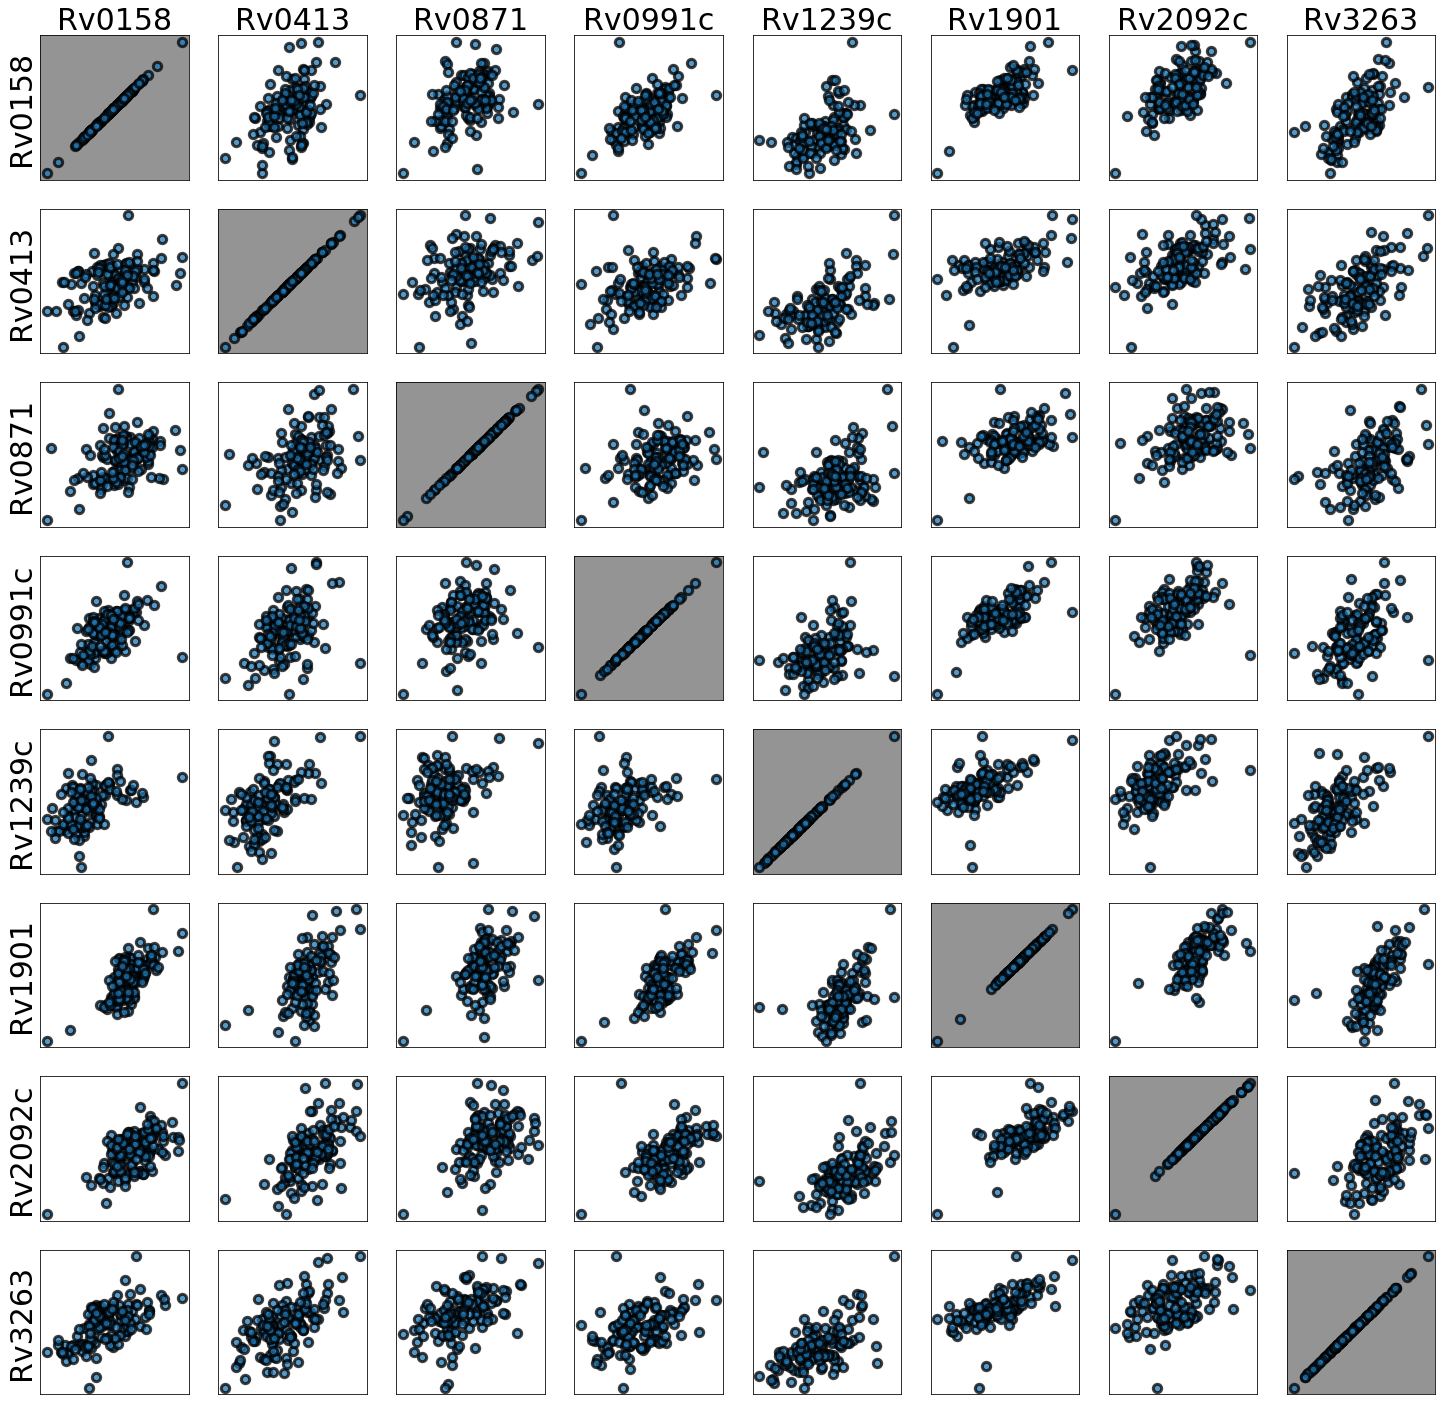

In [39]:
correlation_tile_plot(df_lfc_basis_norm, list_rvid_cinA, list_rvid_cinA, (25, 25), colors_sns)

This is the original analysis with RNAse-J et al: 

In [51]:
path_data = '/home/ajinich/Dropbox/KyuRhee/unknown_function/unknown_redox/figs/GLS_TnSeq_promising/PE_PPE/pe_ppe_cluster_1/'
list_rvid = get_all_genes_from_folder(path_data)

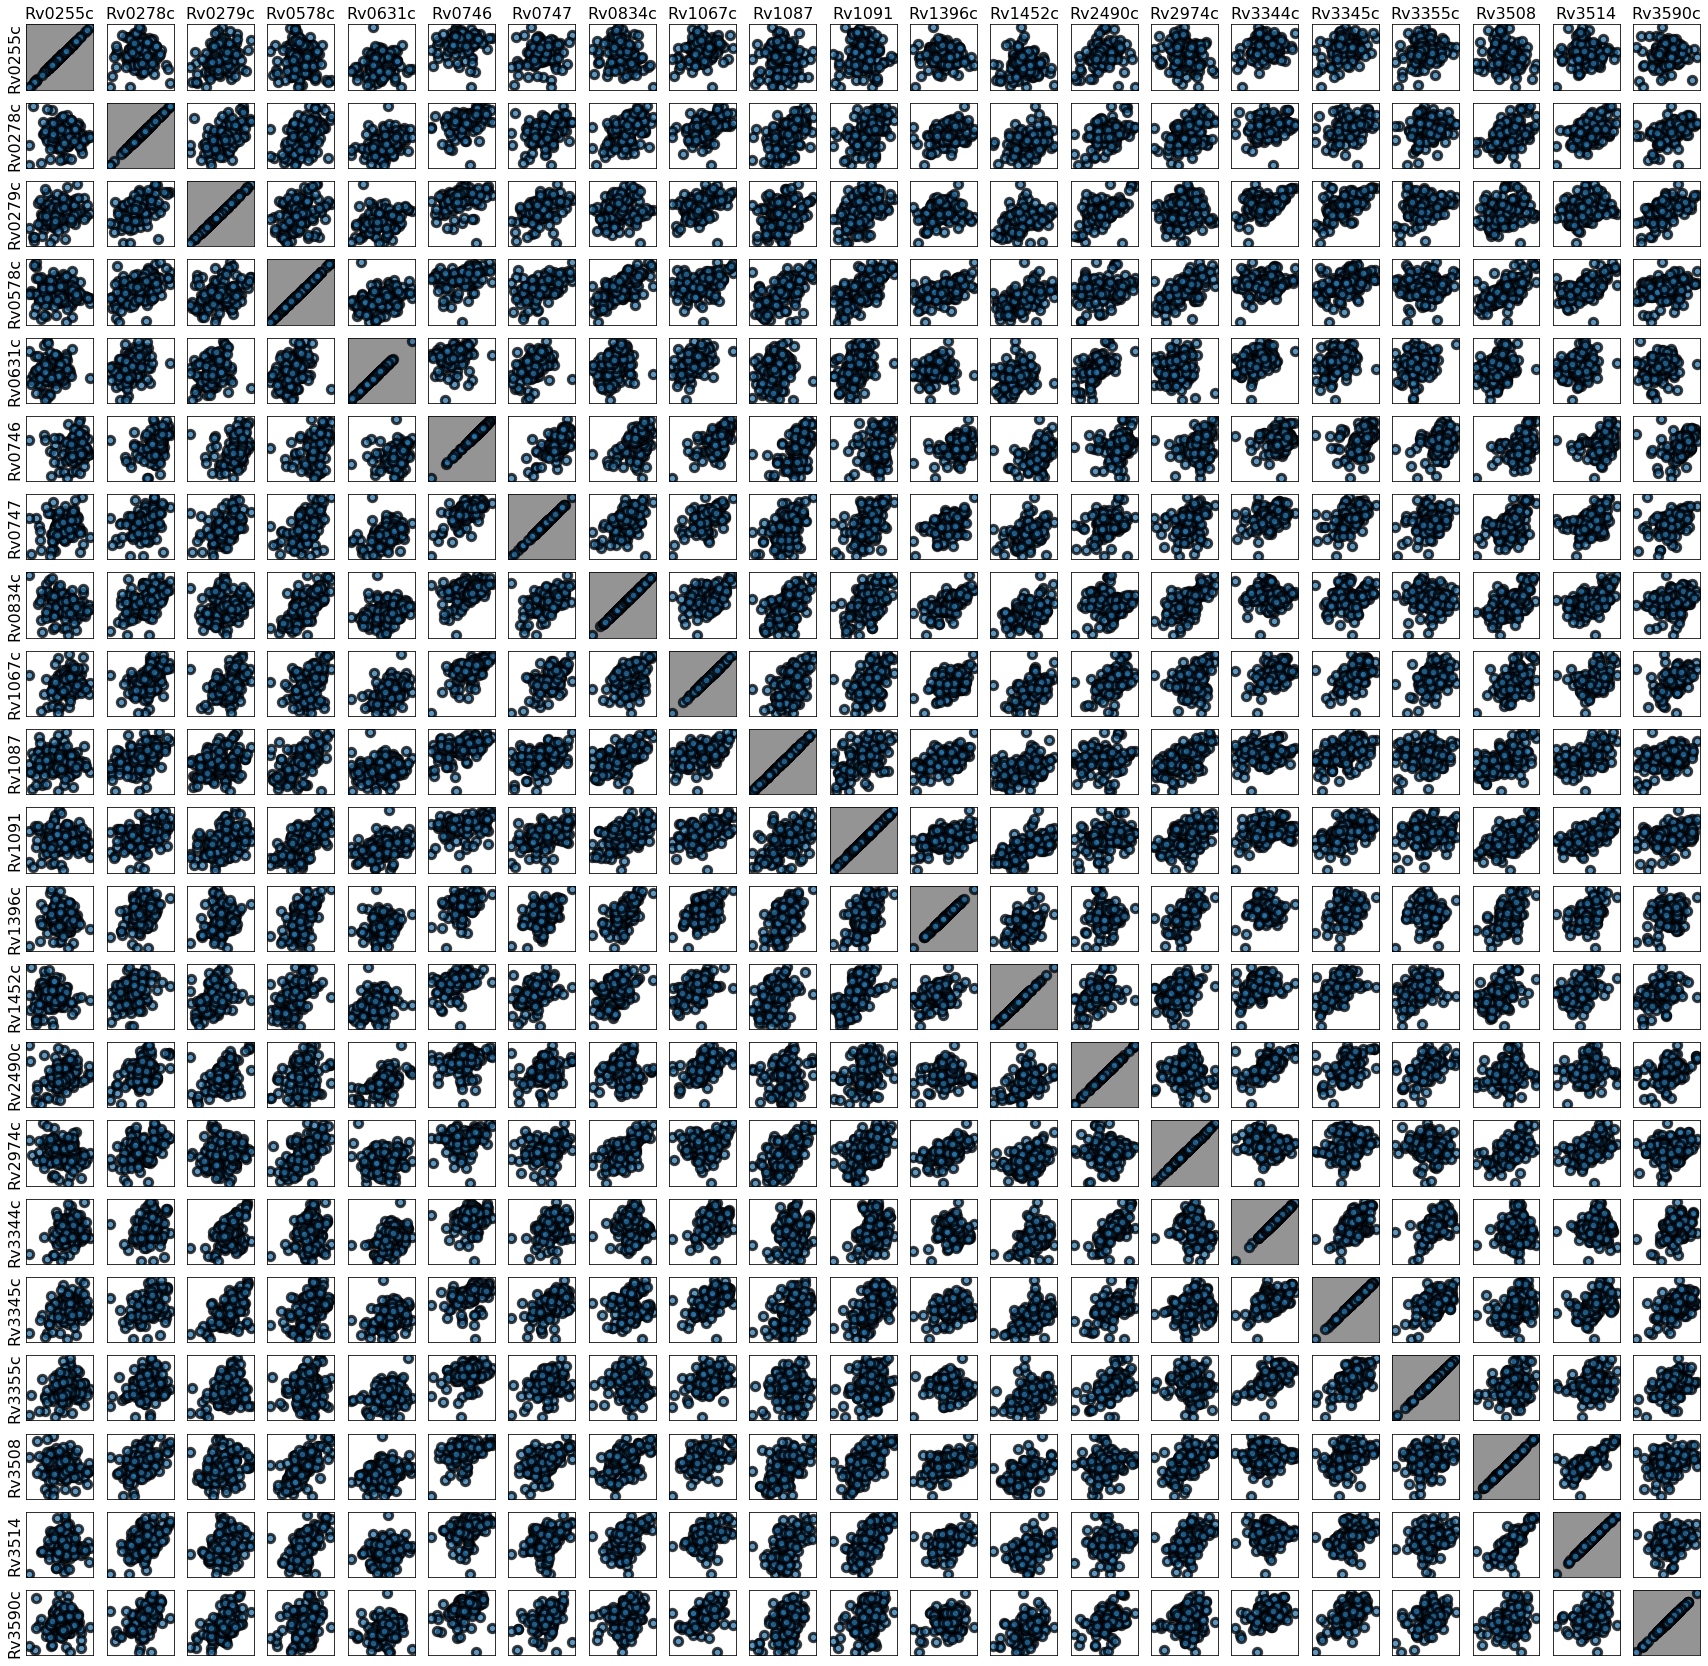

In [56]:
correlation_tile_plot(df_lfc_basis_norm, list_rvid, list_rvid, (30, 30), colors_sns)

Are there connections?

In [48]:
list_test = list_rvid_cinA + list_rvid_rnase

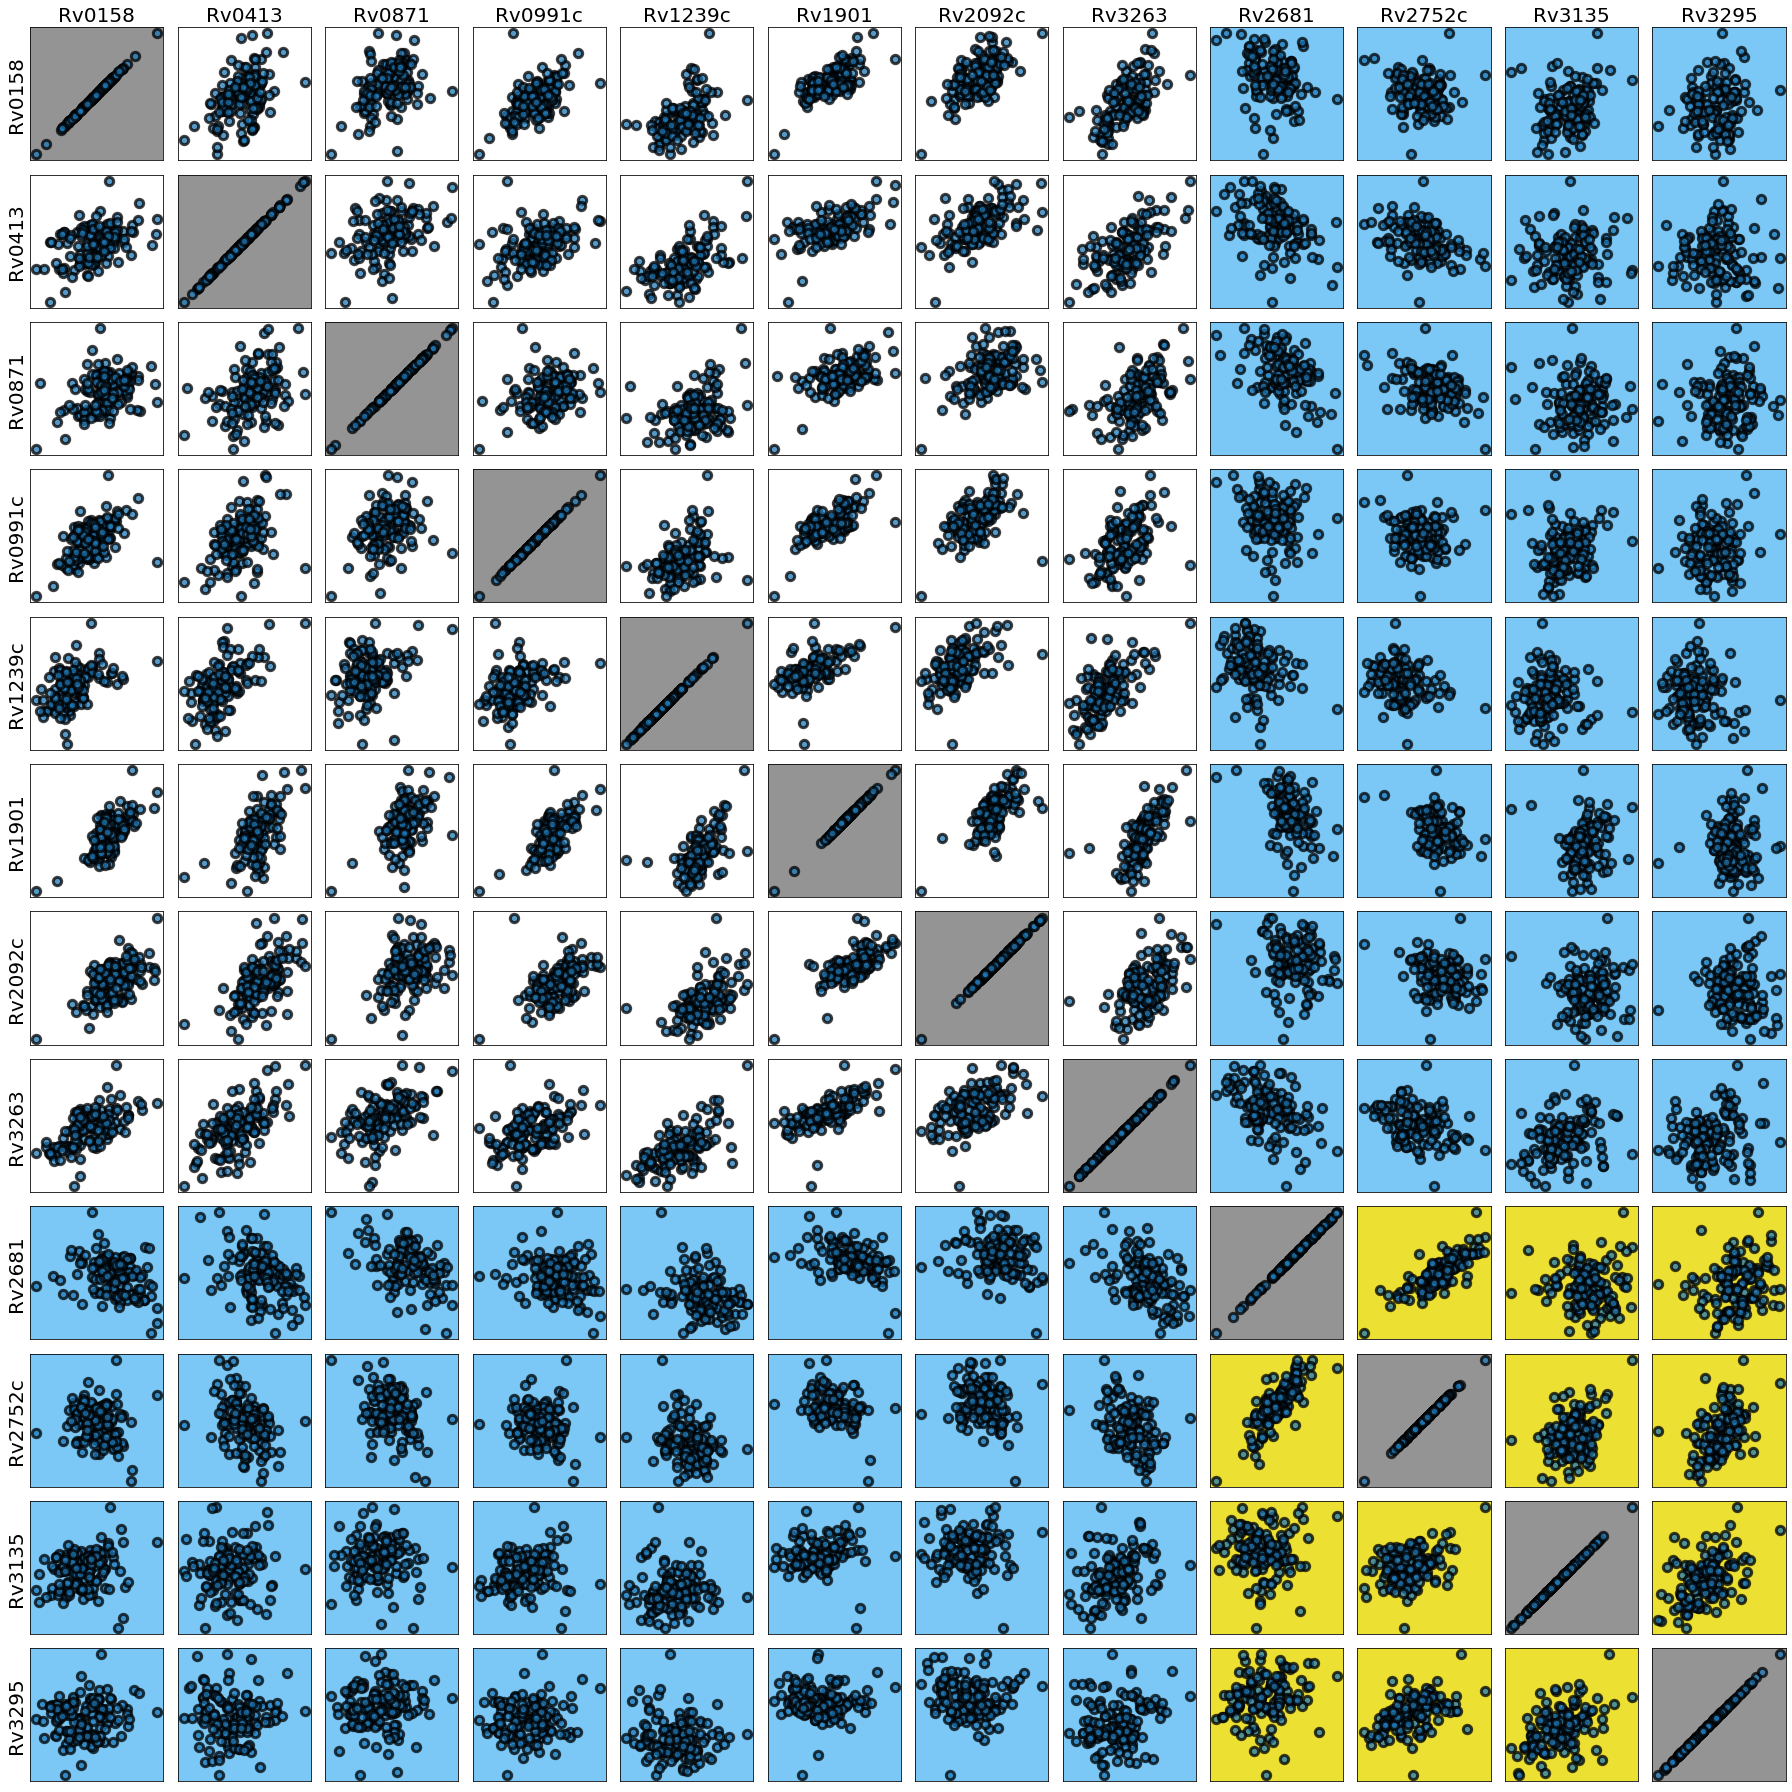

In [50]:
correlation_tile_plot(df_lfc_basis_norm, list_test, list_test, (25, 25), colors_sns, list_rvid_rnase)
plt.tight_layout()
path_fig = '/home/ajinich/Dropbox/KyuRhee/unknown_function/unknown_redox/figs/GLS_TnSeq_promising/revised_unclear_strong/cinA_group/cinA_and_rnase.png'
plt.savefig(path_fig, dpi = 250)


find all the nudix enzymes in the Mtb genome:

In [14]:
fn_up_func = '../data/tests/uniprot-proteome_UP000001584.xlsx'
df_up_func = pd.read_excel(fn_up_func)
re_str = 'Rv\d\d\d\dc?'
list_rvids = [re.findall(re_str, str_temp)[0] for str_temp in df_up_func['Gene names']]
df_up_func['Rv_ID'] = list_rvids
df_up_func.sort_values(by = 'Rv_ID', inplace=True)
df_up_func['annot_int'] = [int(annot.split()[0]) for annot in df_up_func.Annotation]

/home/ajinich/miniconda3/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [16]:
df_up_func.head(2)

Entry   Entry name    Status  \
1184  P9WNW3   DNAA_MYCTU  reviewed   
1080  P9WNU1  DPO3B_MYCTU  reviewed   

                                          Protein names  \
1184     Chromosomal replication initiator protein DnaA   
1080  Beta sliding clamp (Beta clamp) (Sliding clamp...   

                            Gene names  \
1184             dnaA Rv0001 MTV029.01   
1080  dnaN Rv0002 MTCY10H4.0 MTV029.02   

                                               Organism  Length  Annotation  \
1184  Mycobacterium tuberculosis (strain ATCC 25618 ...   507.0  4 out of 5   
1080  Mycobacterium tuberculosis (strain ATCC 25618 ...   402.0  4 out of 5   

     Rhea ID EC number Catalytic activity ChEBI  \
1184     NaN       NaN                NaN   NaN   
1080     NaN       NaN                NaN   NaN   

                                               Sequence  \
1184  MTDDPGSGFTTVWNAVVSELNGDPKVDDGPSSDANLSAPLTPQQRA...   
1080  MDAATTRVGLTDLTFRLLRESFADAVSWVAKNLPARPAVPVLSGVL...   

                                          Function [CC]   Rv_ID  annot_int  
1184  FUNCTION: Plays an important role in the initi...  Rv0001          4  
1080  FUNCTION: Confers DNA tethering and processivi...  Rv0002          4

## For protein sequence similarity with ESM: 

In [60]:
def df_to_fasta(df, file_out_name):
    
    with open(file_out_name, 'w') as fout:
        
        for index, row in df.iterrows():
            fout.write( '>'+row['Entry']+'\n' )
            fout.write( row['Sequence']+'\n' )
            
    

In [61]:
fout = '../data/annotations/uniprot-proteome_UP000001584.fasta'
df_to_fasta(df_up_func, fout)